# DS Automation Assignment

Using our either our original churn data from week 1 or our prepped churn data from week 2:
- use pycaret or TPOT find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- upload this Jupyter Notebook and Python file and requirements.txt files to a GitHub repository
- write a short summary of the process and results in your GitHub README.md file.
- turn in a link to the repository in the week 5 assignment dropbox.

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [5]:
import sys
sys.version

'3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]'

In [6]:
import pandas as pd
df=pd.read_csv('/Users/taniaaguilar/Desktop/Desktop - Tania’s MacBook Air/Regis University/Intro to DS/HW/churn_data.csv', index_col= 'customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [7]:
!jupyter kernelspec list

Available kernels:
  pycaret310     /Users/taniaaguilar/Library/Jupyter/kernels/pycaret310
  tpot310        /Users/taniaaguilar/Library/Jupyter/kernels/tpot310
  week5-py310    /Users/taniaaguilar/Library/Jupyter/kernels/week5-py310
  python3        /Users/taniaaguilar/Desktop/Desktop - Tania’s MacBook Air/Regis University/Intro to DS/HW/Week 5/.venv/share/jupyter/kernels/python3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   object 
 2   Contract        7043 non-null   object 
 3   PaymentMethod   7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 440.2+ KB


PYCARET

In [9]:
from pycaret.classification import ClassificationExperiment #setup, compare_models, predict_model, save_model, load_model
from pycaret.classification import load_model, predict_model

In [10]:
automl = ClassificationExperiment()
#Creates a variable where we will be performing our experiment 

In [11]:
automl.setup(df, target='Churn')
#we are establishing which column is the one we are trying to predict and its saved under the automl variable. It preps data and rules for experiment

,Description,Value
0,Session id,6304
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 7)"
5,Transformed data shape,"(7043, 12)"
6,Transformed train set shape,"(4930, 12)"
7,Transformed test set shape,"(2113, 12)"
8,Numeric features,3
9,Categorical features,3


In [12]:
automl

In [13]:
best_model = automl.compare_models()
#I created a variable that stores the best performing model based on accuracy after comparing it with multiple ml models. Now that the ml model is trained and validated,
#it is ready to make predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7917,0.8328,0.7917,0.7815,0.7839,0.4302,0.4349,0.3460
ada,Ada Boost Classifier,0.7899,0.8364,0.7899,0.7787,0.7809,0.4207,0.4265,0.0250
lda,Linear Discriminant Analysis,0.7886,0.8213,0.7886,0.7792,0.7818,0.4260,0.4297,0.0120
ridge,Ridge Classifier,0.7868,0.8213,0.7868,0.7730,0.7736,0.3960,0.4067,0.0100
gbc,Gradient Boosting Classifier,0.7866,0.8338,0.7866,0.7746,0.7771,0.4100,0.4159,0.0500
lightgbm,Light Gradient Boosting Machine,0.7826,0.8245,0.7826,0.7718,0.7747,0.4061,0.4103,0.2610
rf,Random Forest Classifier,0.7655,0.7950,0.7655,0.7562,0.7594,0.3699,0.3723,0.0510
knn,K Neighbors Classifier,0.7615,0.7406,0.7615,0.7473,0.7512,0.3418,0.3468,0.0150
et,Extra Trees Classifier,0.7570,0.7694,0.7570,0.7509,0.7531,0.3584,0.3597,0.0420
dummy,Dummy Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.0110


In [14]:
best_model
#we determine the best model based on accuarcy is the logistics regression model (this run)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6304, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

“Although precision is useful when the cost of false positives is high, churn prediction problems typically prioritize recall or F1 score, since failing to identify customers who will churn is often more costly than incorrectly flagging a non-churner. In this case, the logistic regression model performed well across accuracy, recall, precision, and AUC, making it a strong overall choice.”

In [15]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

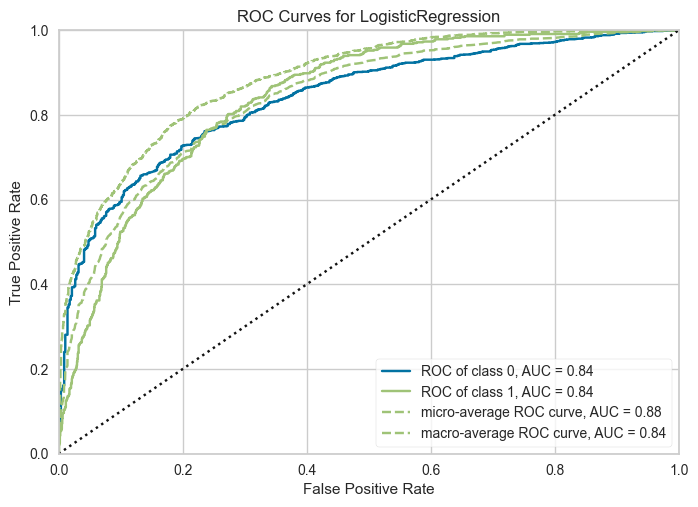

In [16]:
automl.plot_model(best_model)
#pycaret displays the ROC curve by default

There is an 83% probability that the model will rank a randomly chosen churner higher than a randomly chosen non-churner.

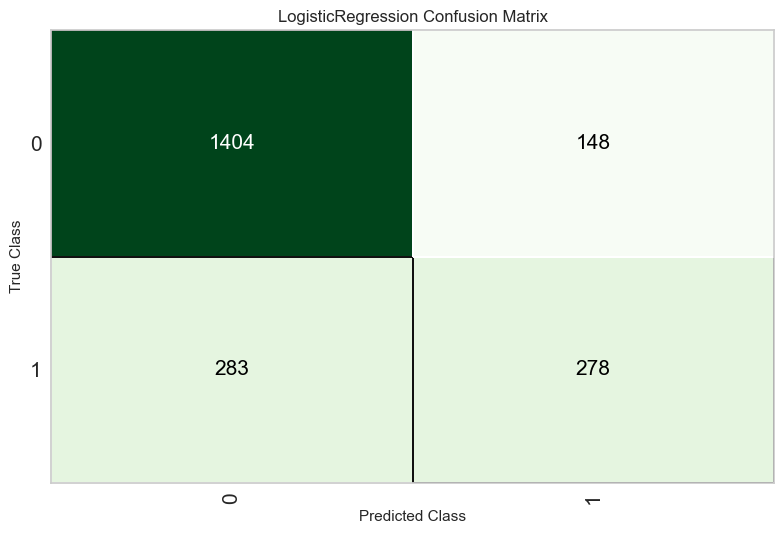

In [17]:
automl.plot_model(best_model, plot = 'confusion_matrix')

In [18]:
one_row=df.iloc[-2:-1]
one_row.shape

(1, 7)

In [19]:
prediction_one = automl.predict_model(best_model, data=one_row)
prediction_one[["prediction_label", "prediction_score"]]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000


,prediction_label,prediction_score
customerID,,
8361-LTMKD,No,0.5239


In [20]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7944,0.8367,0.7944,0.7837,0.7862,0.4350,0.4402


In [21]:
predictions

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.850000,29.850000,No,Yes,0.5901
5575-GNVDE,34,Yes,One year,Mailed check,56.950001,1889.500000,No,No,0.9418
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.849998,108.150002,Yes,No,0.6277
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.299999,1840.750000,No,No,0.9438
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.699997,151.649994,Yes,Yes,0.6307
...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.800003,1990.500000,No,No,0.8107
2234-XADUH,72,Yes,One year,Credit card (automatic),103.199997,7362.899902,No,No,0.9038
4801-JZAZL,11,No,Month-to-month,Electronic check,29.600000,346.450012,No,No,0.5432


In [ ]:
automl.save_model(best_model, 'churn_pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                 

In [23]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                 

In [24]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('churn_pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [25]:
new_pycaret.predict_model(loaded_model, data=one_row)[["prediction_label", "prediction_score"]]

,prediction_label,prediction_score
customerID,,
8361-LTMKD,No,0.5001


In [26]:
new_df = pd.read_csv("/Users/taniaaguilar/Desktop/Desktop - Tania’s MacBook Air/Regis University/Intro to DS/HW/Week 5/new_churn_data.csv", index_col="customerID")
new_df.shape, new_df.head()

((5, 7),
             tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
 customerID                                                                  
 9305-CKSKC      22             1         0              2           97.40   
 1452-KNGVK       8             0         1              1           77.30   
 6723-OKKJM      28             1         0              0           28.25   
 7832-POPKP      62             1         0              2          101.70   
 6348-TACGU      10             0         0              1           51.15   
 
             TotalCharges  charge_per_tenure  
 customerID                                   
 9305-CKSKC        811.70          36.895455  
 1452-KNGVK       1701.95         212.743750  
 6723-OKKJM        250.90           8.960714  
 7832-POPKP       3106.56          50.105806  
 6348-TACGU       3440.97         344.097000  )

In [27]:
loaded_model = load_model("churn_pycaret_model")  # no .pkl needed here

pred_new = predict_model(loaded_model, data=new_df)
pred_new[["prediction_label", "prediction_score"]]

Transformation Pipeline and Model Successfully Loaded


,prediction_label,prediction_score
customerID,,
9305-CKSKC,Yes,0.7833
1452-KNGVK,Yes,0.8535
6723-OKKJM,No,0.7204
7832-POPKP,No,0.5537
6348-TACGU,Yes,0.8059


In [28]:
! pip freeze > requirements.txt

In [29]:
%run ./predict_churn_pycaret.py


Transformation Pipeline and Model Successfully Loaded
           prediction_label  prediction_score
customerID                                   
9305-CKSKC              Yes            0.7833
1452-KNGVK              Yes            0.8535
6723-OKKJM               No            0.7204
7832-POPKP               No            0.5537
6348-TACGU              Yes            0.8059


<Figure size 800x550 with 0 Axes>

In [30]:
%run "/Users/taniaaguilar/.../predict_churn_pycaret.py"


Exception: File `'/Users/taniaaguilar/.../predict_churn_pycaret.py'` not found.

In [31]:
#from IPython.display import Code

Code('predict_churn_pycaret.py')

NameError: name 'Code' is not defined

In [ ]:
#%run "/Users/taniaaguilar/Desktop/Desktop - Tania’s MacBook Air/Regis University/Intro to DS/HW/Week 5/predict_churn_pycaret.py"
